In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import preprocessing
import time

# Data

In [2]:
# Medical Insurance Cost dataset from https://www.kaggle.com/mirichoi0218/insurance
insurance = pd.read_csv('~/Desktop/Data_Science/insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance.shape

(1338, 7)

## Features

### Age

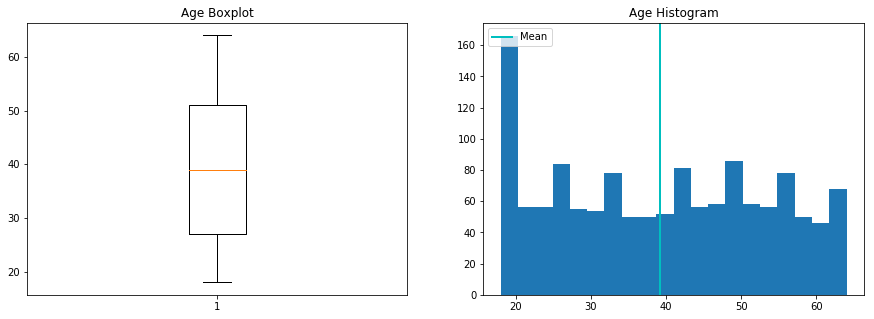

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(insurance['age'].dropna(how = 'any'))
plt.title('Age Boxplot')

plt.subplot(1, 2, 2)
plt.hist(insurance['age'].dropna(how = 'any'), bins=20)
plt.axvline(insurance['age'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Age Histogram')

plt.show()

Ages range from 18 to 64 - adults before medicare age.  The average age is 39, which is below the mid-point of the age range, mostly due the greatest number of records for those under age 20.

### Sex/Gender

male      676
female    662
Name: sex, dtype: int64


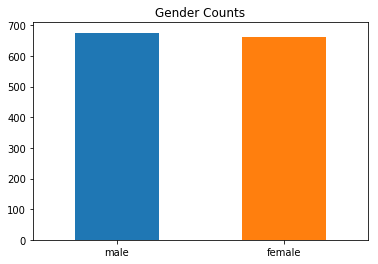

In [7]:
plt.title('Gender Counts')
pd.value_counts(insurance['sex']).plot.bar()
plt.xticks(rotation = 0)
print(insurance['sex'].value_counts())

Nearly equal number of male and female records, just 14 more male records than female.

In [8]:
#Convert to numeric
insurance['male_gender'] = 0
insurance.loc[insurance['sex'] == 'male', 'male_gender'] = 1

#Delete original 'sex' variable
insurance = insurance.drop('sex', 1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

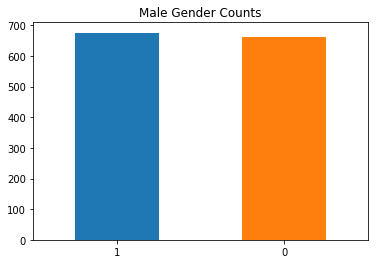

In [9]:
plt.title('Male Gender Counts')
pd.value_counts(insurance['male_gender']).plot.bar()
plt.xticks(rotation = 0)

### BMI/Obesity

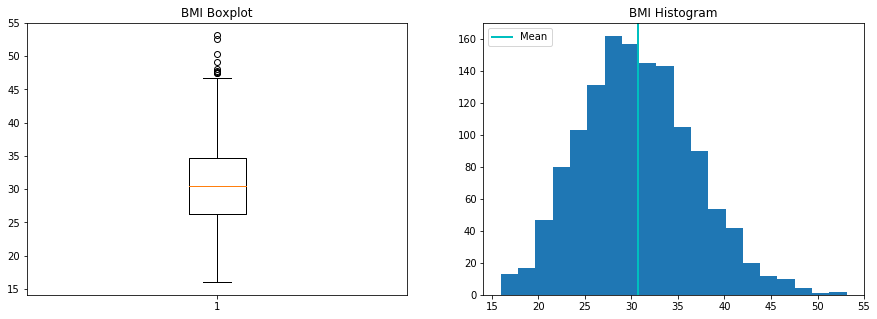

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(insurance['bmi'].dropna(how = 'any'))
plt.title('BMI Boxplot')

plt.subplot(1, 2, 2)
plt.hist(insurance['bmi'].dropna(how = 'any'), bins=20)
plt.axvline(insurance['bmi'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('BMI Histogram')

plt.show()

Normal distribution of values, with a median of 31.7

According to Wikipedia, the body mass index (BMI) is a value derived from the weight and height of an individual. Commonly accepted BMI ranges are underweight: under 18.5 kg/m2, normal weight: 18.5 to 25, overweight: 25 to 30, obese: over 30.  This means that most of these records are for individuals considered to have an unhealthy weight for their height.

In [11]:
#Create new binary variable for Obesity
insurance['obesity'] = 0
insurance.loc[insurance['bmi'] > 30, 'obesity'] = 1

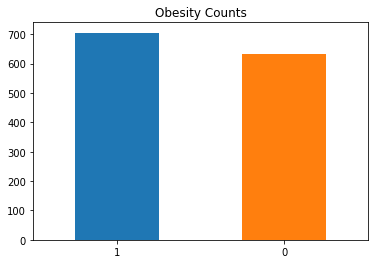

In [12]:
plt.title('Obesity Counts')
pd.value_counts(insurance['obesity']).plot.bar()
plt.xticks(rotation = 0)
plt.show()

### Children

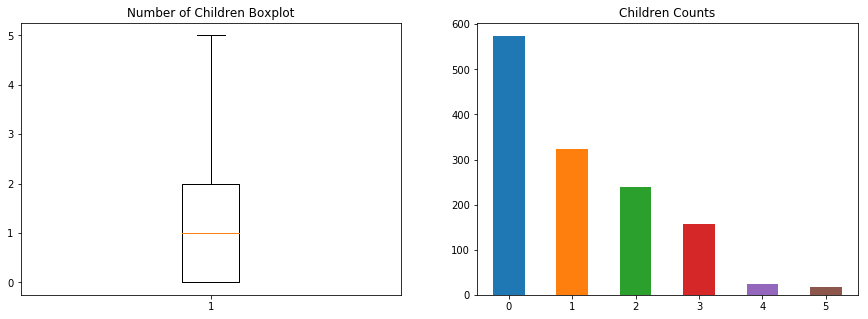

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(insurance['children'].dropna(how = 'any'))
plt.title('Number of Children Boxplot')

plt.subplot(1, 2, 2)
plt.title('Children Counts')
pd.value_counts(insurance['children']).plot.bar()
plt.xticks(rotation = 0)

plt.show()

More records are for individuals with children than not, but the most frequent number of children is none.<br>
Let's make a new boolean feature that captures whether the record is for a parent.

In [14]:
#create binary parent feature
insurance['parent'] = 0
insurance.loc[insurance['children'] > 0, 'parent'] = 1

(array([0, 1]), <a list of 2 Text xticklabel objects>)

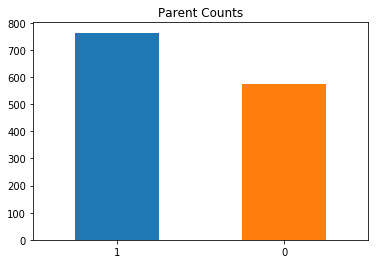

In [15]:
plt.title('Parent Counts')
pd.value_counts(insurance['parent']).plot.bar()
plt.xticks(rotation = 0)

### Smoker

yes     274
no     1064
dtype: int64


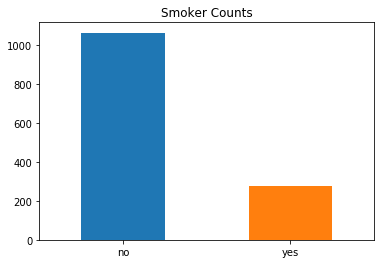

In [16]:
plt.title('Smoker Counts')
pd.value_counts(insurance['smoker']).plot.bar()
plt.xticks(rotation = 0)
print(pd.value_counts(insurance['smoker'].values, sort=False))

There are more non-smokers (1064) than smokers (274)

In [17]:
#Convert to numeric
insurance['smoke'] = 0
insurance.loc[insurance['smoker'] == 'yes', 'smoke'] = 1

#Delete original 'smoker' variable
insurance = insurance.drop('smoker', 1)

0    1064
1     274
dtype: int64


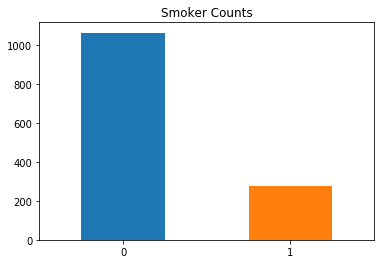

In [18]:
plt.title('Smoker Counts')
pd.value_counts(insurance['smoke']).plot.bar()
plt.xticks(rotation = 0)
print(pd.value_counts(insurance['smoke'].values, sort=False))

### Region

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

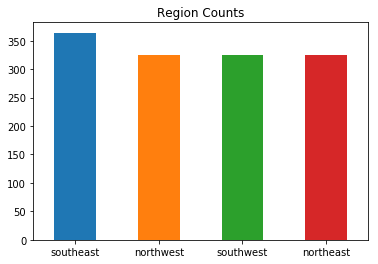

In [19]:
plt.title('Region Counts')
pd.value_counts(insurance['region']).plot.bar()
plt.xticks(rotation = 0)

There are an equal number of records from the Northwest, Northeast and Southwest, and slightly more records from the Southeast.

In [20]:
#Convert to numeric
insurance['south'] = 0
insurance.loc[insurance['region'].str.contains("south", na=False), 'south'] = 1
insurance['east'] = 0
insurance.loc[insurance['region'].str.contains("east", na=False), 'east'] = 1

#Delete original 'smoker' variable
insurance = insurance.drop('region', 1)

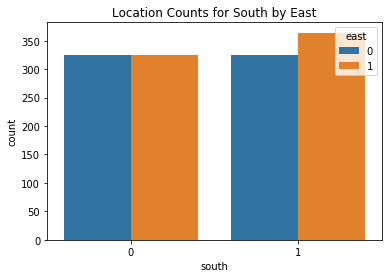

In [21]:
import seaborn as sns
plt.title('Location Counts for South by East')
sns.countplot(x='south', hue='east', data=insurance)

### Charges

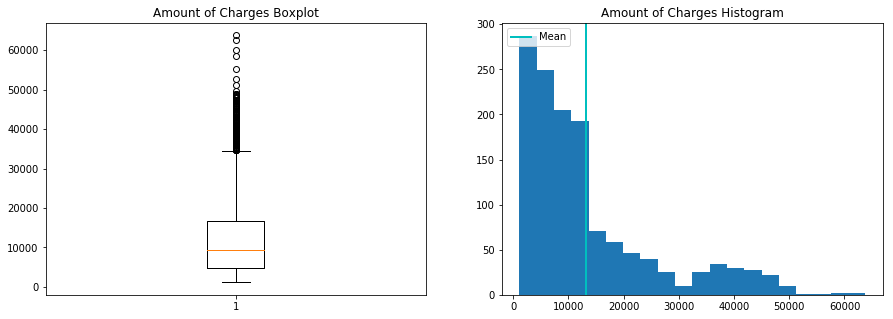

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(insurance['charges'].dropna(how = 'any'))
plt.title('Amount of Charges Boxplot')

plt.subplot(1, 2, 2)
plt.hist(insurance['charges'].dropna(how = 'any'), bins=20)
plt.axvline(insurance['charges'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Amount of Charges Histogram')

plt.show()

Heavily left-skewed data with a mean of $13,270. Outliers range up to $63,770.

Let's try a log of the Charges variable to get a more normally distributed feature.

In [23]:
#create feature by taking log if insurance variable
insurance['charges_log'] = np.log(insurance['charges'])

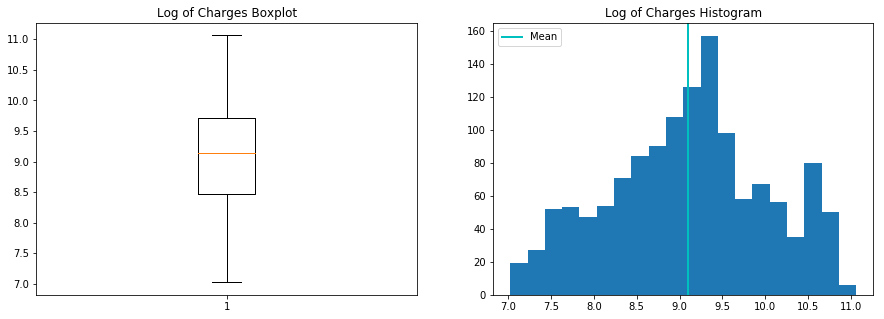

In [24]:
#visualize new feature
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(insurance['charges_log'].dropna(how = 'any'))
plt.title('Log of Charges Boxplot')

plt.subplot(1, 2, 2)
plt.hist(insurance['charges_log'].dropna(how = 'any'), bins=20)
plt.axvline(insurance['charges_log'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Log of Charges Histogram')

plt.show()

That looks like a more useful feature - no more outliers and the distribution is much closer to normal

Let's also consider a binary variable the groups charges as above or below the mean

In [25]:
#Create binary charges variable based on mean
insurance['high_charge'] = 0
insurance.loc[insurance['charges'] > insurance['charges'].mean(), 'high_charge'] = 1

0    918
1    420
dtype: int64


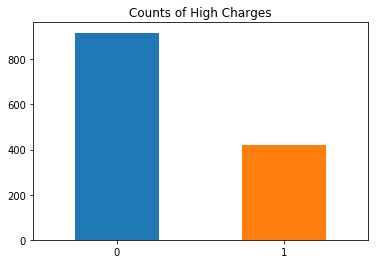

In [26]:
plt.title('Counts of High Charges')
pd.value_counts(insurance['high_charge']).plot.bar()
plt.xticks(rotation = 0)
print(pd.value_counts(insurance['high_charge'].values, sort=False))

### Recap Data

In [27]:
insurance.head()

,age,bmi,children,charges,male_gender,obesity,parent,smoke,south,east,charges_log,high_charge
0,19,27.900,0,16884.92400,0,0,0,1,1,0,9.734176,1
1,18,33.770,1,1725.55230,1,1,1,0,1,1,7.453302,0
2,28,33.000,3,4449.46200,1,1,1,0,1,1,8.400538,0
3,33,22.705,0,21984.47061,1,0,0,0,0,0,9.998092,1
4,32,28.880,0,3866.85520,1,0,0,0,0,0,8.260197,0


In [28]:
insurance.shape

(1338, 12)

In [29]:
insurance.describe()

,age,bmi,children,charges,male_gender,obesity,parent,smoke,south,east,charges_log,high_charge
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.526906,0.571001,0.204783,0.514948,0.514200,9.098659,0.313901
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.499462,0.495118,0.403694,0.499963,0.499985,0.919527,0.464250
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.022756,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.463853,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,9.146552,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,9.719558,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.063045,1.000000


## Models to predict Obesity

In [30]:
y = insurance['obesity']
X = insurance.drop('obesity', 1)

### Vanilla logistic regression

In [31]:
lr = LogisticRegression(C=1e9)
fit = lr.fit(X, y)

# Display results
pred_y_sklearn = lr.predict(X)
print('\n Accuracy by Obesity')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))


 Accuracy by Obesity
obesity    0    1
row_0            
0        605   22
1         28  683

 Percentage accuracy
0.9626307922272048


In [32]:
lr_score = cross_val_score(lr, X, y, cv=10)
print("Cross Validation Scores:\n", lr_score)
print("\nCross Validation mean of: %0.2f (+/- %0.2f)" % (lr_score.mean(), lr_score.std()))

Cross Validation Scores:
 [0.95555556 0.96296296 0.96296296 0.93283582 0.95522388 0.96992481
 0.96240602 0.96992481 0.98496241 0.97744361]

Cross Validation mean of: 0.96 (+/- 0.01)


Logistic Regression without regularization results in an average accuracy of 96% (+/- 1)

### Ridge logistic regression

    lambda_value  ridge_score       std
0          0.001     0.827526  0.039262
1          0.011     0.950728  0.015598
2          0.021     0.958207  0.012854
3          0.031     0.960440  0.011436
4          0.041     0.961176  0.010862
5          0.051     0.961176  0.011843
6          0.061     0.961933  0.012112
7          0.071     0.962668  0.009890
8          0.081     0.963409  0.010715
9          0.091     0.961928  0.010643
10         0.101     0.962663  0.012423
11         0.111     0.962668  0.012850
12         0.121     0.963415  0.011208
13         0.131     0.961922  0.014651
14         0.141     0.962668  0.012850
15         0.151     0.961922  0.014651
16         0.161     0.961922  0.014651
17         0.171     0.961922  0.015032
18         0.181     0.962668  0.014480
19         0.191     0.962668  0.014480
20         0.201     0.962674  0.015224
21         0.211     0.962668  0.012402
22         0.221     0.964167  0.013187
23         0.231     0.962674  0.015224


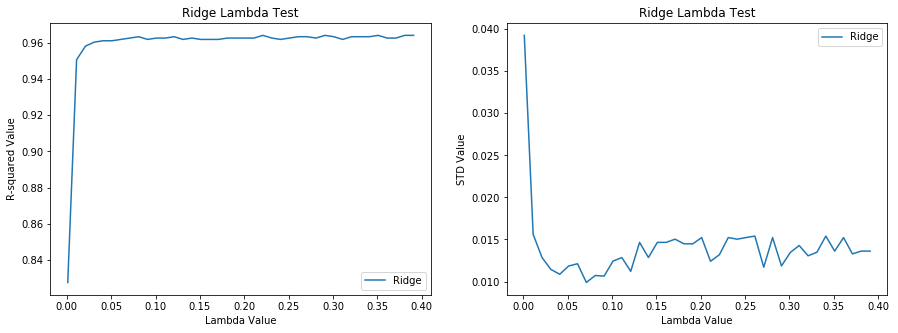

In [33]:
#test lambda values

r_results = pd.DataFrame()

def lambda_test(value):
    #Test lambda value in ridge model
    ridgeregr = LogisticRegression(C=value, penalty="l2")  
    ridge_score = cross_val_score(ridgeregr, X, y, cv=10)
    #return dataframe of r-squared for each lambda value
    data = pd.DataFrame({"lambda_value": [value], "ridge_score": [ridge_score.mean()], "std": [ridge_score.std()]})
    return data

#Test large values for lamdba
appended_data = []
lambda_range = np.arange(0.001, 0.4, 0.01)
for i in lambda_range:
    result = lambda_test(i)
    appended_data.append(result)
r_results = pd.concat(appended_data, ignore_index=True)

print(r_results)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(r_results['lambda_value'], r_results['ridge_score'], label="Ridge")
plt.xlabel('Lambda Value')
plt.ylabel('R-squared Value')
plt.legend(loc='best') 
plt.title('Ridge Lambda Test')

plt.subplot(1, 2, 2)
plt.plot(r_results['lambda_value'], r_results['std'], label="Ridge")
plt.xlabel('Lambda Value')
plt.ylabel('STD Value')
plt.legend(loc='best') 
plt.title('Ridge Lambda Test')

plt.show()

In [34]:
ridgeregr = LogisticRegression(C=0.331, penalty="l2") 
ridgeregr.fit(X, y)

ridgeregr_score = cross_val_score(ridgeregr, X, y, cv=10)
print("Cross Validation Scores:\n", ridgeregr_score)
print("\nCross Validation mean of: %0.2f (+/- %0.2f)" % (ridgeregr_score.mean(), ridgeregr_score.std()))

Cross Validation Scores:
 [0.95555556 0.96296296 0.96296296 0.93283582 0.95522388 0.96992481
 0.96240602 0.97744361 0.98496241 0.97744361]

Cross Validation mean of: 0.96 (+/- 0.01)


Ridge Regression results in an average accuracy of 96% (+/- 1)

### Lasso logistic regression

    lambda_value  lass_score       std
0           0.20    0.960385  0.014599
1           0.21    0.961131  0.014506
2           0.22    0.961883  0.011321
3           0.23    0.961883  0.014746
4           0.24    0.967124  0.008968
5           0.25    0.963387  0.014722
6           0.26    0.962618  0.013401
7           0.27    0.966378  0.013861
8           0.28    0.964122  0.014118
9           0.29    0.964863  0.014612
10          0.30    0.967118  0.013845
11          0.31    0.968611  0.012414
12          0.32    0.969357  0.010274
13          0.33    0.966383  0.012590
14          0.34    0.967124  0.012585
15          0.35    0.970120  0.012003
16          0.36    0.967141  0.017398
17          0.37    0.967881  0.016699
18          0.38    0.965654  0.016392
19          0.39    0.966383  0.015730
20          0.40    0.965637  0.014985
21          0.41    0.970137  0.010492
22          0.42    0.967876  0.012505
23          0.43    0.972354  0.012941
24          0.44    0.968

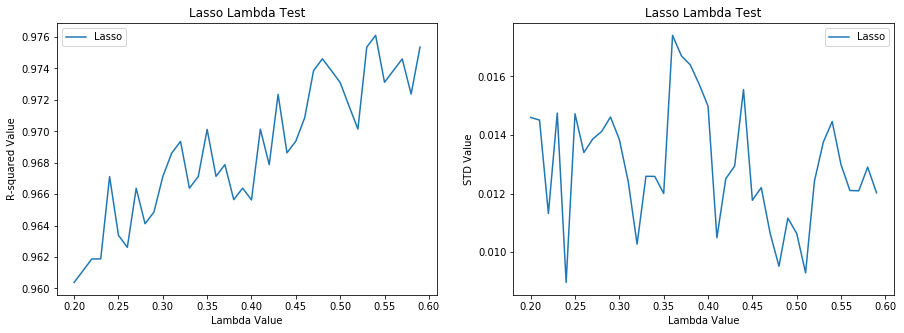

In [35]:
#test lambda values

r_results = pd.DataFrame()

def lambda_test(value):
    #Test lambda value in ridge model
    lass = LogisticRegression(C=value, penalty="l1")  
    lass_score = cross_val_score(lass, X, y, cv=10)
    #return dataframe of r-squared for each lambda value
    data = pd.DataFrame({"lambda_value": [value], "lass_score": [lass_score.mean()], "std": [lass_score.std()]})
    return data

#Test large values for lamdba
appended_data = []
lambda_range = np.arange(0.2, 0.6, 0.01)
for i in lambda_range:
    result = lambda_test(i)
    appended_data.append(result)
lasso_results = pd.concat(appended_data, ignore_index=True)

print(lasso_results)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(lasso_results['lambda_value'], lasso_results['lass_score'], label="Lasso")
plt.xlabel('Lambda Value')
plt.ylabel('R-squared Value')
plt.legend(loc='best') 
plt.title('Lasso Lambda Test')

plt.subplot(1, 2, 2)
plt.plot(lasso_results['lambda_value'], lasso_results['std'], label="Lasso")
plt.xlabel('Lambda Value')
plt.ylabel('STD Value')
plt.legend(loc='best') 
plt.title('Lasso Lambda Test')

plt.show()

In [36]:
lass = LogisticRegression(C=0.27, penalty="l1")
lassfit = lass.fit(X, y)

lass_score = cross_val_score(lass, X, y, cv=10)
print("Cross Validation Scores:\n", lass_score)
print("\nCross Validation mean of: %0.2f (+/- %0.2f)" % (lass_score.mean(), lass_score.std()))

Cross Validation Scores:
 [0.96296296 0.97777778 0.97777778 0.93283582 0.96268657 0.96992481
 0.96240602 0.97744361 0.98496241 0.95488722]

Cross Validation mean of: 0.97 (+/- 0.01)


Lasso Regression results in an average accuracy of 97% (+/- 1), so that is an improvement over Ridge and regular Logistic Regression.  

Let's see if we can do better with some feature selection

### Feature Selection using Lasso

In [37]:
print(lassfit.coef_)

[[ 7.12600433e-02  1.28347474e+00  2.73882470e-01  4.25286022e-04
  -4.07097963e-02  0.00000000e+00 -1.01011840e+00 -2.23715072e-01
  -8.24288800e-02 -5.11295309e+00  0.00000000e+00]]


In [40]:
insurance.columns

Index(['age', 'bmi', 'children', 'charges', 'male_gender', 'obesity', 'parent',
       'smoke', 'south', 'east', 'charges_log', 'high_charge'],
      dtype='object')

In [43]:
#drop columns - charges, gender, high_charge
cols = [3,4,11]

fs_insurance = insurance.drop(insurance.columns[cols], axis=1)

In [44]:
fs_insurance.head()

,age,bmi,children,obesity,parent,smoke,south,east,charges_log
0,19,27.900,0,0,0,1,1,0,9.734176
1,18,33.770,1,1,1,0,1,1,7.453302
2,28,33.000,3,1,1,0,1,1,8.400538
3,33,22.705,0,0,0,0,0,0,9.998092
4,32,28.880,0,0,0,0,0,0,8.260197


## Refit Models after feature selection

In [45]:
y = fs_insurance['obesity']
X = fs_insurance.drop('obesity', 1)

### Logistic Regression

In [47]:
lr = LogisticRegression(C=1e9)
lrfit = lr.fit(X, y)

lr_score = cross_val_score(lr, X, y, cv=10)
print("Logistic Regression \n")
print("Cross Validation Score Range: %0.2f to %0.2f" % (lr_score.min(), lr_score.max()))
print("\nCross Validation Mean: %0.2f (+/- %0.2f)" % (lr_score.mean(), lr_score.std()))

Logistic Regression 

Cross Validation Score Range: 0.98 to 1.00

Cross Validation Mean: 0.99 (+/- 0.01)


Refitting a logistic regression model after feature selection results in a very impressive average accuracy of 99%, with a 10-fold test range of 0.98 to 1.00

### Ridge Regression

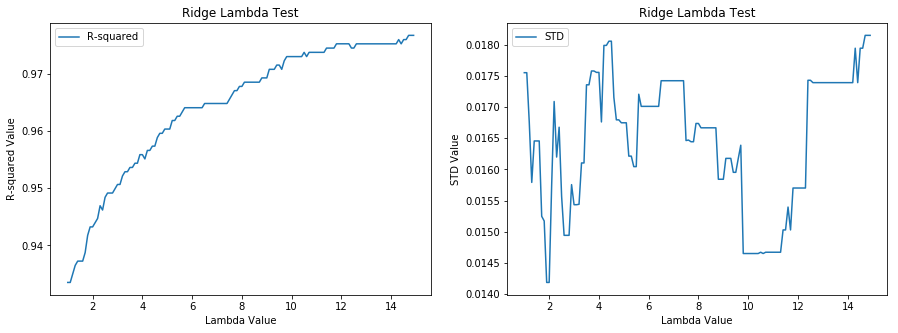

Ridge Lambda Value(s) with lowest STD:


,lambda_value,ridge_score,std
9,1.9,0.943225,0.014184
10,2.0,0.943225,0.014184


In [48]:
# re-tune Ridge

r_results = pd.DataFrame()

def lambda_test(value):
    #Test lambda value in ridge model
    ridgeregr = LogisticRegression(C=value, penalty="l2")  
    ridge_score = cross_val_score(ridgeregr, X, y, cv=10)
    #return dataframe of r-squared for each lambda value
    data = pd.DataFrame({"lambda_value": [value], "ridge_score": [ridge_score.mean()], "std": [ridge_score.std()]})
    return data

#Test large values for lamdba
appended_data = []
lambda_range = np.arange(1, 15, 0.1)
for i in lambda_range:
    result = lambda_test(i)
    appended_data.append(result)
r_results = pd.concat(appended_data, ignore_index=True)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(r_results['lambda_value'], r_results['ridge_score'], label="R-squared")
plt.xlabel('Lambda Value')
plt.ylabel('R-squared Value')
plt.legend(loc='best') 
plt.title('Ridge Lambda Test')

plt.subplot(1, 2, 2)
plt.plot(r_results['lambda_value'], r_results['std'], label="STD")
plt.xlabel('Lambda Value')
plt.ylabel('STD Value')
plt.legend(loc='best') 
plt.title('Ridge Lambda Test')

plt.show()

print('Ridge Lambda Value(s) with lowest STD:')
r_results.loc[r_results['std'] == r_results['std'].min()]

In [49]:
ridge = LogisticRegression(C=2, penalty="l2") 
ridge.fit(X, y)

ridge_score = cross_val_score(ridge, X, y, cv=10)
print("Ridge Regression \n")
print("Cross Validation Score Range: %0.2f to %0.2f" % (ridge_score.min(), ridge_score.max()))
print("\nCross Validation mean of: %0.2f (+/- %0.2f)" % (ridge_score.mean(), ridge_score.std()))

Ridge Regression 

Cross Validation Score Range: 0.92 to 0.97

Cross Validation mean of: 0.94 (+/- 0.01)


Following feature selection, our Ridge model is showing reduced accuracy when optimizing regularization.  

In [50]:
ridge = LogisticRegression(C=10, penalty="l2") 
ridge.fit(X, y)

ridge_score = cross_val_score(ridge, X, y, cv=10)
print("Ridge Regression \n")
print("Cross Validation Score Range: %0.2f to %0.2f" % (ridge_score.min(), ridge_score.max()))
print("\nCross Validation mean of: %0.2f (+/- %0.2f)" % (ridge_score.mean(), ridge_score.std()))

Ridge Regression 

Cross Validation Score Range: 0.94 to 0.99

Cross Validation mean of: 0.97 (+/- 0.01)


It turns out the best result with Ridge Regression comes not from optimizing regularization of minimize the standard deviation, but by finding a balance between accuracy and variation.

### Lasso Regression

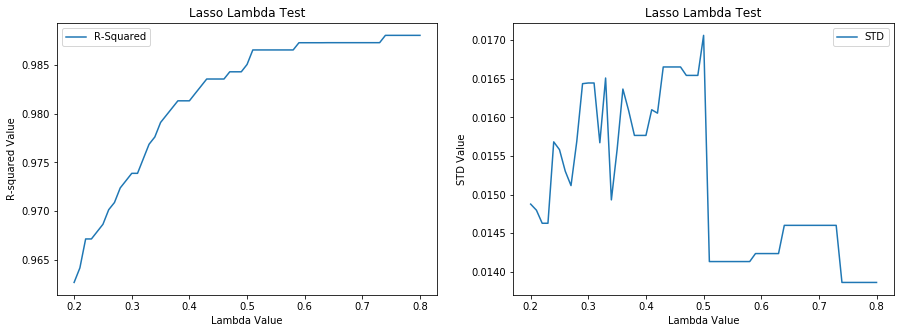

Lasso Lambda Value(s) with lowest STD:


,lambda_value,lass_score,std
54,0.74,0.988037,0.013864
55,0.75,0.988037,0.013864
56,0.76,0.988037,0.013864
57,0.77,0.988037,0.013864
58,0.78,0.988037,0.013864
59,0.79,0.988037,0.013864
60,0.80,0.988037,0.013864


In [51]:
# re-tune lasso

r_results = pd.DataFrame()

def lambda_test(value):
    #Test lambda value in ridge model
    lass = LogisticRegression(C=value, penalty="l1")  
    lass_score = cross_val_score(lass, X, y, cv=10)
    #return dataframe of r-squared for each lambda value
    data = pd.DataFrame({"lambda_value": [value], "lass_score": [lass_score.mean()], "std": [lass_score.std()]})
    return data

#Test large values for lamdba
appended_data = []
lambda_range = np.arange(0.2, 0.8, 0.01)
for i in lambda_range:
    result = lambda_test(i)
    appended_data.append(result)
lasso_results = pd.concat(appended_data, ignore_index=True)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(lasso_results['lambda_value'], lasso_results['lass_score'], label="R-Squared")
plt.xlabel('Lambda Value')
plt.ylabel('R-squared Value')
plt.legend(loc='best') 
plt.title('Lasso Lambda Test')

plt.subplot(1, 2, 2)
plt.plot(lasso_results['lambda_value'], lasso_results['std'], label="STD")
plt.xlabel('Lambda Value')
plt.ylabel('STD Value')
plt.legend(loc='best') 
plt.title('Lasso Lambda Test')

plt.show()

print('Lasso Lambda Value(s) with lowest STD:')
lasso_results.loc[lasso_results['std'] == lasso_results['std'].min()]

In [52]:
lasso = LogisticRegression(C=0.8, penalty="l1")
lassfit = lasso.fit(X, y)

lasso_score = cross_val_score(lasso, X, y, cv=10)
print("Lasso Regression \n")
print("Cross Validation Score Range: %0.2f to %0.2f" % (lasso_score.min(), lasso_score.max()))
print("\nCross Validation mean of: %0.2f (+/- %0.2f)" % (lasso_score.mean(), lasso_score.std()))

Lasso Regression 

Cross Validation Score Range: 0.96 to 1.00

Cross Validation mean of: 0.99 (+/- 0.01)


Lasso has produced greater accuracy than Ridge, matching regular logistic regression's accuracy of 99%.  <br>
When we compare the range of accuracy score with Lasso and logistic regression, Lasso falls short.  With this insurance data and the question of obesity, the best result comes using Lasso for feature selection, followed by a Logistic Regression model.